In [ ]:
# مكتبة التعامل مع بيئات الأتاري
!pip install ale_py
# مكتبة التعلم المُعزز
!pip install stable_baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 58.0 MB/s eta 0:00:00


In [ ]:
# استيراد مكتبة التعامل مع الألعاب
import ale_py

In [ ]:
# دالة إنشاء بيئة أتاري
from stable_baselines3.common.env_util import make_atari_env

In [ ]:
# معرف البيئة
env_id= 'ALE/Riverraid-v5'
#env_id= 'ALE/Pong-v5'
#env_id= 'ALE/Breakout-v5'
#env_id= 'ALE/MsPacman-v5'
#env_id= 'ALE/MarioBros-v5'

# إنشاء البيئة
env = make_atari_env(env_id, seed=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [110, 156,  66],
        [110, 156,  66],
        [110, 156,  66]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
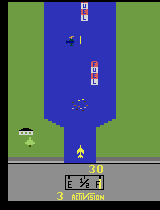

In [ ]:
# إعادة التهيئة
obs = env.reset()
# الإظهار
env.render()

In [ ]:
# عدد حلقات التقييم
n_eval_episodes = 32

In [ ]:
# مكافآت كل الحلقات
episodes_total_reward=0
# قائمة لمكافآت كل حلقة
reward_history_before = []

In [ ]:
for episode in range(n_eval_episodes):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        action = env.action_space.sample()
        action=[action]
        obs, reward, done, infos = env.step(action)
        total_reward += reward[0]
    reward_history_before.append(total_reward)
    episodes_total_reward+=total_reward
    print(f"Before Training - Episode {episode + 1} - Total Reward: {total_reward}")
print(f"No training Mean reward: {round(episodes_total_reward/n_eval_episodes,2)}")

Before Training - Episode 1 - Total Reward: 1.0
Before Training - Episode 2 - Total Reward: 1.0
Before Training - Episode 3 - Total Reward: 2.0
Before Training - Episode 4 - Total Reward: 1.0
Before Training - Episode 5 - Total Reward: 0.0
Before Training - Episode 6 - Total Reward: 1.0
Before Training - Episode 7 - Total Reward: 1.0
Before Training - Episode 8 - Total Reward: 1.0
Before Training - Episode 9 - Total Reward: 1.0
Before Training - Episode 10 - Total Reward: 1.0
Before Training - Episode 11 - Total Reward: 1.0
Before Training - Episode 12 - Total Reward: 1.0
Before Training - Episode 13 - Total Reward: 1.0
Before Training - Episode 14 - Total Reward: 1.0
Before Training - Episode 15 - Total Reward: 1.0
Before Training - Episode 16 - Total Reward: 2.0
Before Training - Episode 17 - Total Reward: 3.0
Before Training - Episode 18 - Total Reward: 1.0
Before Training - Episode 19 - Total Reward: 2.0
Before Training - Episode 20 - Total Reward: 2.0
Before Training - Episode 21 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# مسار مجلد العمل
working_folder='/content/drive/MyDrive/RLModels/'

In [ ]:
# عدد دورات التدريب
total_timesteps=50000

In [ ]:
# خوارزمية PPO
from stable_baselines3 import PPO

# إنشاء النموذج
model_PPO = PPO('CnnPolicy', env, verbose=0)

In [ ]:
# التدريب
model_PPO.learn(total_timesteps=total_timesteps)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# اسم اللعبة
id=env_id.split('/')[-1]
# اسم النموذج
model_name=f"PPO_{id}_{total_timesteps}"

In [ ]:
# مسار حفظ النموذج
model_PPO_file_path=working_folder+model_name

In [ ]:
# حفظ النموذج
model_PPO.save(model_PPO_file_path)
print(f"Model saved to {model_PPO_file_path}")

Model saved to /content/drive/MyDrive/RLModels/PPO_Riverraid-v5_50000


In [ ]:
# استخدام النموذج في اللعب
episodes_total_reward=0
reward_history_after_ppo = []
for episode in range(n_eval_episodes):
    obs  = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model_PPO.predict(obs, deterministic=True)
        obs, reward, done, infos = env.step(action)
        total_reward += reward[0]
    reward_history_after_ppo.append(total_reward)
    episodes_total_reward+=total_reward
    print(f"PPO After Training - Episode {episode + 1} - Total Reward: {total_reward}")
print(f"PPO Mean reward: {round(episodes_total_reward/n_eval_episodes,2)}")

PPO After Training - Episode 1 - Total Reward: 0.0
PPO After Training - Episode 2 - Total Reward: 2.0
PPO After Training - Episode 3 - Total Reward: 14.0
PPO After Training - Episode 4 - Total Reward: 11.0
PPO After Training - Episode 5 - Total Reward: 15.0
PPO After Training - Episode 6 - Total Reward: 1.0
PPO After Training - Episode 7 - Total Reward: 15.0
PPO After Training - Episode 8 - Total Reward: 0.0
PPO After Training - Episode 9 - Total Reward: 0.0
PPO After Training - Episode 10 - Total Reward: 2.0
PPO After Training - Episode 11 - Total Reward: 18.0
PPO After Training - Episode 12 - Total Reward: 5.0
PPO After Training - Episode 13 - Total Reward: 0.0
PPO After Training - Episode 14 - Total Reward: 5.0
PPO After Training - Episode 15 - Total Reward: 8.0
PPO After Training - Episode 16 - Total Reward: 11.0
PPO After Training - Episode 17 - Total Reward: 15.0
PPO After Training - Episode 18 - Total Reward: 0.0
PPO After Training - Episode 19 - Total Reward: 17.0
PPO After Tra

In [ ]:
# خوارزمية A2C
from stable_baselines3 import A2C
# إنشاء النموذج
model_A2C = A2C('CnnPolicy', env, verbose=0)
# التدريب
model_A2C.learn(total_timesteps=total_timesteps)
# اسم النموذج
model_name=f"A2C_{id}_{total_timesteps}"
# مسار ملف النموذج
model_A2C_file_path=working_folder+model_name
# حفظ النموذج
model_A2C.save(model_A2C_file_path)
print(f"Model saved to {model_A2C_file_path}")

Model saved to /content/drive/MyDrive/RLModels/A2C_Riverraid-v5_50000


In [ ]:
episodes_total_reward=0
reward_history_after_a2c = []
for episode in range(n_eval_episodes):
    obs  = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model_A2C.predict(obs, deterministic=True)
        obs, reward, done, infos = env.step(action)
        total_reward += reward[0]
    reward_history_after_a2c.append(total_reward)
    episodes_total_reward+=total_reward
    print(f"A2C After Training - Episode {episode + 1} - Total Reward: {total_reward}")
print(f"A2C Mean reward: {round(episodes_total_reward/n_eval_episodes,2)}")

A2C After Training - Episode 1 - Total Reward: 0.0
A2C After Training - Episode 2 - Total Reward: 2.0
A2C After Training - Episode 3 - Total Reward: 20.0
A2C After Training - Episode 4 - Total Reward: 2.0
A2C After Training - Episode 5 - Total Reward: 2.0
A2C After Training - Episode 6 - Total Reward: 2.0
A2C After Training - Episode 7 - Total Reward: 8.0
A2C After Training - Episode 8 - Total Reward: 16.0
A2C After Training - Episode 9 - Total Reward: 2.0
A2C After Training - Episode 10 - Total Reward: 0.0
A2C After Training - Episode 11 - Total Reward: 8.0
A2C After Training - Episode 12 - Total Reward: 9.0
A2C After Training - Episode 13 - Total Reward: 2.0
A2C After Training - Episode 14 - Total Reward: 9.0
A2C After Training - Episode 15 - Total Reward: 7.0
A2C After Training - Episode 16 - Total Reward: 16.0
A2C After Training - Episode 17 - Total Reward: 0.0
A2C After Training - Episode 18 - Total Reward: 2.0
A2C After Training - Episode 19 - Total Reward: 3.0
A2C After Training

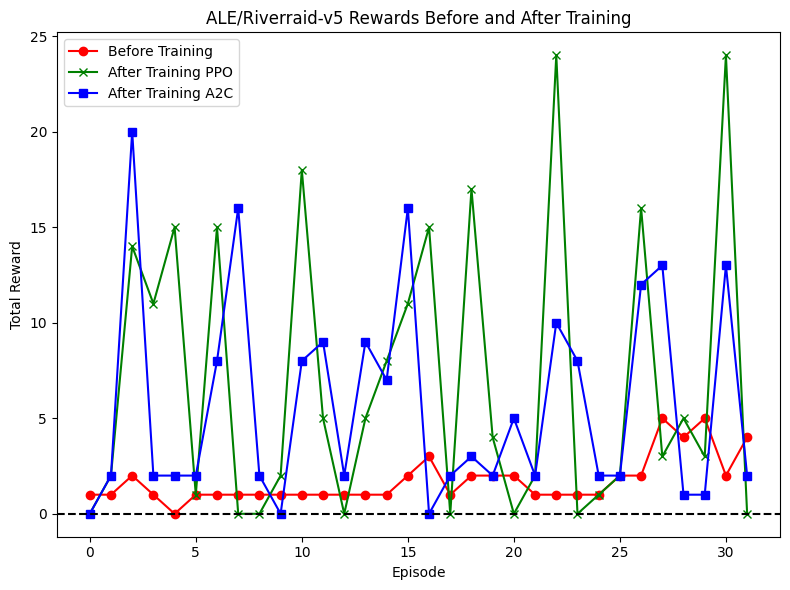

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(reward_history_before, label="Before Training", color="red", linestyle="-", marker="o")
plt.plot(reward_history_after_ppo, label="After Training PPO", color="green", linestyle="-", marker="x")
plt.plot(reward_history_after_a2c, label="After Training A2C", color="blue", linestyle="-", marker="s")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title(f"{env_id} Rewards Before and After Training")
plt.axhline(y=0, color="black", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()